In [58]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from keras.utils.np_utils import to_categorical


In [59]:
X_train=pd.read_csv('../input/ahcd1/Arabic Handwritten Characters Dataset CSV/csvTrainImages 13440x1024.csv')
X_test=pd.read_csv('../input/ahcd1/Arabic Handwritten Characters Dataset CSV/csvTestImages 3360x1024.csv')
y_train=pd.read_csv('../input/ahcd1/Arabic Handwritten Characters Dataset CSV/csvTrainLabel 13440x1.csv')
y_test=pd.read_csv('../input/ahcd1/Arabic Handwritten Characters Dataset CSV/csvTestLabel 3360x1.csv')

X_train = tf.keras.utils.normalize(X_train,axis=1)
X_test = tf.keras.utils.normalize(X_test,axis=1)

In [60]:
print(y_train.shape)
y_train = y_train.values.reshape(13439,)
print(y_train.shape)


(13439, 1)
(13439,)


In [61]:
print(y_train[0])

1


(13439, 1024)
(3359, 1024)
(13439,)
(3359, 1)


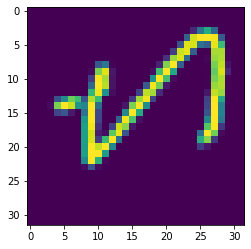

[ 1  1  1 ... 28 28 28]


In [62]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

X_train = X_train.values.reshape(-1,32,32,1)
X_test = X_test.values.reshape(-1,32,32,1)

plt.imshow(X_train[500])
plt.show()
print(y_train)

In [63]:
y_train = to_categorical(y_train, num_classes = 29)
y_test = to_categorical(y_test, num_classes = 29)

In [64]:
print(y_train.shape)

(13439, 29)


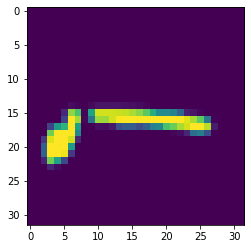

In [65]:
g = plt.imshow(X_train[0][:,:,0])

In [66]:
model = keras.Sequential()

model.add(layers.Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (32,32,1)))
model.add(layers.Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation = "relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(29, activation = "softmax"))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [67]:
print(X_train.shape)

(13439, 32, 32, 1)


In [68]:
history = model.fit(X_train,y_train,validation_data = (X_test,y_test), epochs=20)

Epoch 1/20
420/420 [==============================] - 3s 6ms/step - loss: 2.7116 - accuracy: 0.1996 - val_loss: 0.9539 - val_accuracy: 0.7219
Epoch 2/20
420/420 [==============================] - 2s 5ms/step - loss: 1.1052 - accuracy: 0.6314 - val_loss: 0.5243 - val_accuracy: 0.8422
Epoch 3/20
420/420 [==============================] - 2s 5ms/step - loss: 0.7315 - accuracy: 0.7496 - val_loss: 0.4089 - val_accuracy: 0.8732
Epoch 4/20
420/420 [==============================] - 2s 6ms/step - loss: 0.5471 - accuracy: 0.8200 - val_loss: 0.3015 - val_accuracy: 0.9024
Epoch 5/20
420/420 [==============================] - 2s 5ms/step - loss: 0.4381 - accuracy: 0.8546 - val_loss: 0.2524 - val_accuracy: 0.9193
Epoch 6/20
420/420 [==============================] - 2s 5ms/step - loss: 0.3872 - accuracy: 0.8722 - val_loss: 0.2412 - val_accuracy: 0.9291
Epoch 7/20
420/420 [==============================] - 2s 5ms/step - loss: 0.3218 - accuracy: 0.8911 - val_loss: 0.2176 - val_accuracy: 0.9342
Epoch 

In [69]:
val_loss,val_acc = model.evaluate(X_test,y_test)
print(val_loss,val_acc)

105/105 [==============================] - 0s 3ms/step - loss: 0.1423 - accuracy: 0.9652
0.14233167469501495 0.9651681780815125


In [70]:
results = model.predict(X_test)

6
6


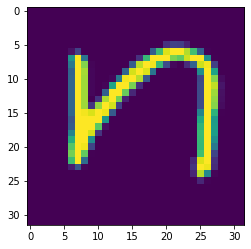

In [71]:
print(results[66].argmax())
print(y_test[66].argmax())

g = plt.imshow(X_test[66][:,:,0])

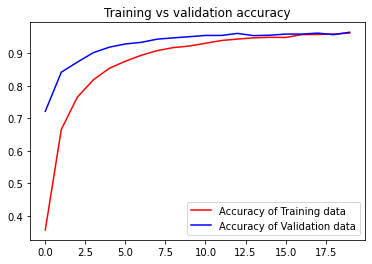

<Figure size 432x288 with 0 Axes>

In [72]:
get_acc = history.history['accuracy']
value_acc = history.history['val_accuracy']
get_loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()